In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### **简单线性回归**

In [2]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta = np.array([1, 10])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e

In [3]:
model = sm.OLS(y,X)
results = model.fit()

In [4]:
print(results.params)

[1.1591223735419007 9.962405617116907]


In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.618e+04
Date:                Tue, 24 May 2022   Prob (F-statistic):          1.92e-148
Time:                        19:09:35   Log-Likelihood:                -134.34
No. Observations:                 100   AIC:                             272.7
Df Residuals:                      98   BIC:                             277.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1591      0.186      6.234      0.0

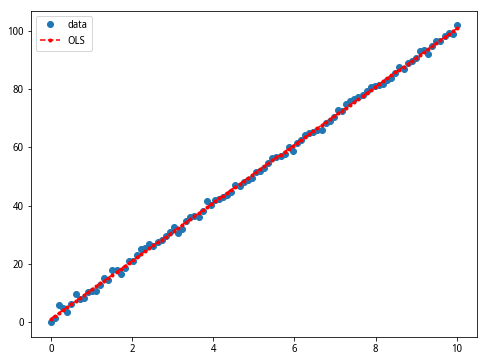

In [6]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

(-0.05, 2, -1, 25)

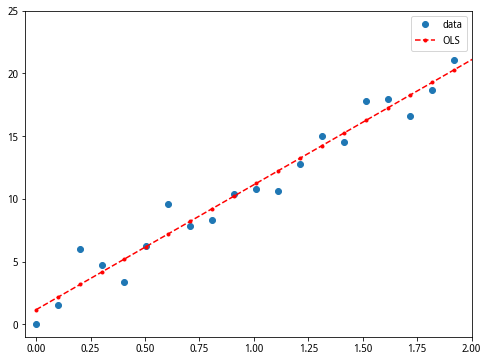

In [7]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, -1, 25))

### **高次模型的回归**

In [8]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e

In [9]:
model = sm.OLS(y,X)
results = model.fit()

In [10]:
print(results.params)

[1.5764135393817789 -0.07835550048205775 10.012339954094184]


In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.889e+06
Date:                Tue, 24 May 2022   Prob (F-statistic):          2.14e-243
Time:                        19:09:44   Log-Likelihood:                -136.71
No. Observations:                 100   AIC:                             279.4
Df Residuals:                      97   BIC:                             287.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5764      0.284      5.560      0.0

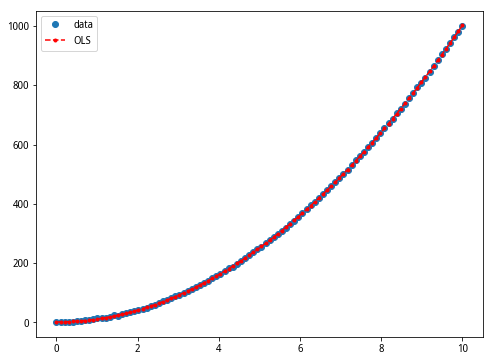

In [12]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

(-0.05, 2, -1, 50)

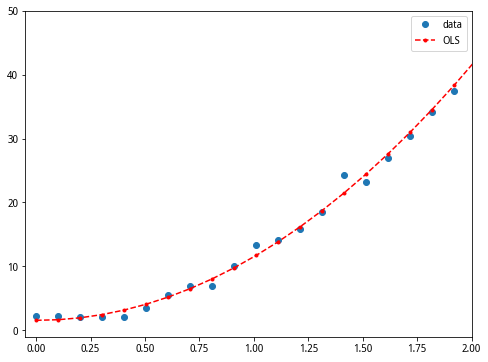

In [13]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, -1, 50))

### **哑变量**

In [14]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = [10, 1, 1, 3, 8]
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e

In [15]:
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     966.3
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.55e-41
Time:                        19:09:50   Log-Likelihood:                -72.038
No. Observations:                  50   AIC:                             152.1
Df Residuals:                      46   BIC:                             159.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3711      0.604     18.835      0.0

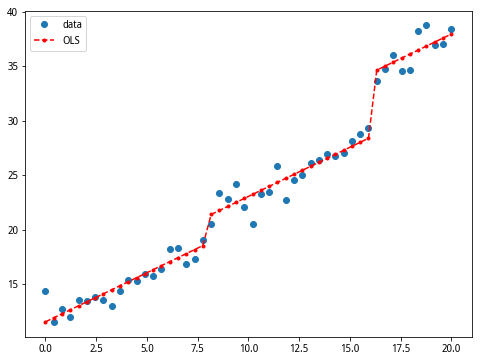

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')

### **简单应用**

In [35]:
data = get_price('000001.XSHG', start_date='2021-01-01', end_date='2022-01-01')
x_price = data['close'].values
data = get_price('399001.XSHE', start_date='2021-01-01', end_date='2022-01-01')
y_price = data['close'].values

In [36]:
x_pct, y_pct = [], []
for i in range(1, len(x_price)):
    x_pct.append(x_price[i]/x_price[i-1]-1)
for i in range(1, len(y_price)):
    y_pct.append(y_price[i]/y_price[i-1]-1)
    
x = np.array(x_pct)
X = sm.add_constant(x)
y = np.array(y_pct)

In [37]:
results = sm.OLS(y, X).fit()
print(results.params)

[-0.00016231857989085333 1.2670934050035958]


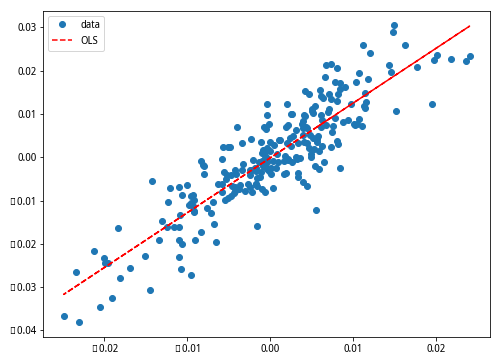

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--', label="OLS")
ax.legend(loc='best')